# benchmarking on omnipath


In [1]:
from scprint import scPrint
from scprint.tasks import GNInfer

from bengrn import BenGRN
import scanpy as sc

from bengrn.base import train_classifier

from anndata.utils import make_index_unique
from bengrn import compute_genie3
from grnndata import utils as grnutils

import pandas as pd

%load_ext autoreload
%autoreload 2 

import torch
torch.set_float32_matmul_precision('medium')

→ connected lamindb: jkobject/scprint


In [2]:
from grnndata import GRNAnnData

import sys
sys.path.append("../tools/DeepSEM")

from src.DeepSEM_cell_type_test_specific_GRN_model import celltype_GRN_model as test_celltype_GRN_model

class DotDict(dict):
    __getattr__ = dict.get
    __setattr__ = dict.__setitem__
    __delattr__ = dict.__delitem__

import scipy.sparse

def run_deepsem(adata):
    import random
    import string

    def generate_random_hash(length=3):
        """Generate a random hash of specified length."""
        characters = string.ascii_letters + string.digits
        return ''.join(random.choice(characters) for _ in range(length))

    random_hash = generate_random_hash()
    opt = DotDict({
        'beta': 0.01,
        'alpha': 1,
        'K1': 1,
        'K2': 2,
        'K': 1,
        'net_file': "",
        'n_epochs': 50,
        'n_hidden': 128,
        'gamma': 0.95,
        'lr': 1e-4,
        'lr_step_size': 0.99,
        'batch_size': 64,
        'data_file': "/tmp/deepsem_"+random_hash+".h5ad",
        'save_name': "/tmp/deepsem/",
        'task': "celltype_GRN"
    })
    print(random_hash)
    if scipy.sparse.issparse(adata.X):
        adata.X = adata.X.toarray()
    adata.write("/tmp/deepsem_"+random_hash+".h5ad")
    model = test_celltype_GRN_model(opt)
    net = model.train_model()
    grn = GRNAnnData(adata.copy(), grn=net)
    del net
    return grn

In [4]:
genes = torch.load(
    '../data/temp/vbd8bavn/epoch=17-step=90000.ckpt'
#    '/pasteur/zeus/projets/p02/ml4ig_hot/Users/jkalfon/scprint_scale/o2uniqsx/checkpoints/epoch=18-step=133000.ckpt', map_location=torch.device('cpu')
)['hyper_parameters']['genes']
NUM_GENES = 5000
MAXCELLS = 1024

In [5]:
CELLTYPES = [
    'kidney distal convoluted tubule epithelial cell',
    'kidney loop of Henle thick ascending limb epithelial cell',
    'kidney collecting duct principal cell',
    'mesangial cell',
    'blood vessel smooth muscle cell',
    'podocyte',
    'macrophage',
    'leukocyte',
    'kidney interstitial fibroblast',
   # 'endothelial cell'
]

In [16]:

import scanpy as sc
import lamindb as ln


→ connected lamindb: jkobject/scprint


In [42]:
adata = sc.read_h5ad('../data/gNNpgpo6gATjuxTE7CCp.h5ad')

In [43]:

ls -alh ../data/gNNpgpo6gATjuxTE7CCp.h5ad

-rw-r--r-- 1 jkalfon ml4ig 712M Jun 26  2024 ../data/gNNpgpo6gATjuxTE7CCp.h5ad


In [46]:
adata.obs.sex.value_counts()

sex
female    28986
male      22384
Name: count, dtype: int64

In [41]:
adata.obs.cell_type.value_counts()

cell_type
endothelial cell                                             8719
kidney proximal convoluted tubule epithelial cell            2036
kidney distal convoluted tubule epithelial cell              1066
leukocyte                                                     996
podocyte                                                      518
kidney interstitial fibroblast                                468
blood vessel smooth muscle cell                               462
kidney collecting duct principal cell                         455
kidney loop of Henle thick ascending limb epithelial cell     388
kidney collecting duct intercalated cell                      367
macrophage                                                     88
macula densa epithelial cell                                   81
kidney granular cell                                           74
mesangial cell                                                 10
Name: count, dtype: int64

In [26]:
ln.Artifact.filter(uid__startswith="yBCKp6HmXuHa0")

<QuerySet [Artifact(uid='yBCKp6HmXuHa0cZptMo7', version='2', is_latest=True, description='preprocessed by scprint', suffix='.h5ad', size=114459656, hash='PIMOH56SgWf3kXpFWmiWYc', _hash_type='sha1-fl', _accessor='AnnData', visibility=1, _key_is_virtual=True, storage_id=1, created_by_id=1, created_at=2023-12-12 09:13:06 UTC)]>

In [35]:

(adata.X>0).sum(1).min()

401

In [6]:
adata = sc.read_h5ad('/home/ml4ig1/scprint/.lamindb/yBCKp6HmXuHa0cZptMo7.h5ad')
#adata = sc.read_h5ad('../data/yBCKp6HmXuHa0cZptMo7.h5ad')
adata.var["isTF"] = False
adata.var.loc[adata.var.symbol.isin(grnutils.TF), "isTF"] = True
adata = adata[:, adata.var.index.isin(genes)]
adata

View of AnnData object with n_obs × n_vars = 15728 × 23149
    obs: 'donor_id', 'self_reported_ethnicity_ontology_term_id', 'organism_ontology_term_id', 'sample_uuid', 'sample_preservation_method', 'tissue_ontology_term_id', 'development_stage_ontology_term_id', 'tissue_section_uuid', 'tissue_section_thickness', 'library_uuid', 'assay_ontology_term_id', 'mapped_reference_annotation', 'is_primary_data', 'cell_type_ontology_term_id', 'author_cell_type', 'disease_ontology_term_id', 'sex_ontology_term_id', 'suspension_type', 'cell_type', 'assay', 'disease', 'organism', 'sex', 'tissue', 'self_reported_ethnicity', 'development_stage', 'cell_culture', 'nnz', 'n_genes_by_counts', 'log1p_n_genes_by_counts', 'total_counts', 'log1p_total_counts', 'pct_counts_in_top_20_genes', 'total_counts_mt', 'log1p_total_counts_mt', 'pct_counts_mt', 'total_counts_ribo', 'log1p_total_counts_ribo', 'pct_counts_ribo', 'total_counts_hb', 'log1p_total_counts_hb', 'pct_counts_hb', 'outlier', 'mt_outlier', 'leiden_3'

(4768, 23149)
(4768, 23149)
NeE
save dir exist
epoch: 1 0.3485831320285797 mse_loss: 0.31308189492959243 kl_loss: 0.03479286021767901 sparse_loss: 0.0007083802909339563
epoch: 2 0.3134874197152945 mse_loss: 0.27260539623407215 kl_loss: 0.03992175891135748 sparse_loss: 0.0009602713891161749
epoch: 4 0.12219483061478688 mse_loss: 0.07408711256889197 kl_loss: 0.047052062761325106 sparse_loss: 0.0010556575770561511
epoch: 5 0.12155372133621803 mse_loss: 0.07202590428865872 kl_loss: 0.04842166086802116 sparse_loss: 0.0011061579615880663
epoch: 7 0.11474201197807606 mse_loss: 0.06384417386009143 kl_loss: 0.04976902930782391 sparse_loss: 0.00112881046684029
epoch: 8 0.11516985583763856 mse_loss: 0.06401629516711602 kl_loss: 0.05001601275916283 sparse_loss: 0.0011375509650231553
epoch: 10 0.10889838062799893 mse_loss: 0.05758368825683227 kl_loss: 0.05017377951970467 sparse_loss: 0.0011409135499539284
epoch: 11 0.10919086119303337 mse_loss: 0.057887404010846064 kl_loss: 0.05016270881662002 spar

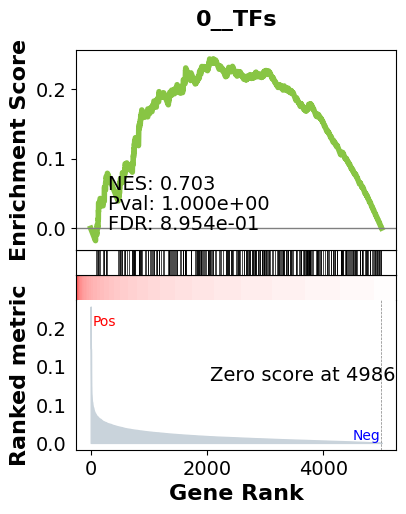

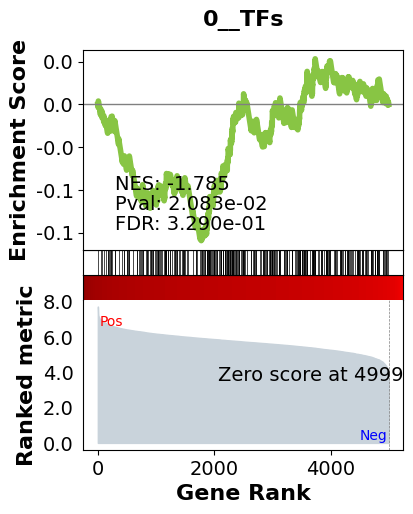

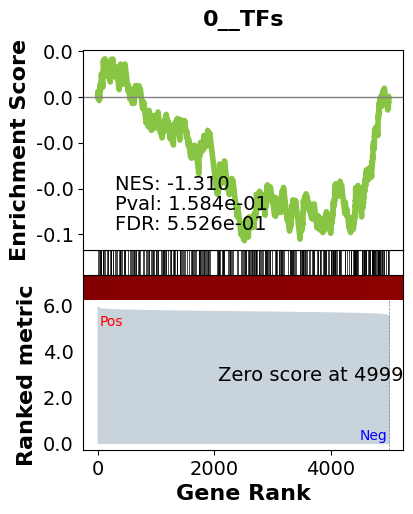

_________________________________________
TF specific enrichment
found some significant results for  2.9411764705882355 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3565 genes
intersection pct: 0.713
precision:  0.0010620463635891406 
recall:  0.9998518079430943 
random precision: 0.001062203773751226


 98%|█████████▊| 125/128 [00:02<00:00, 43.24it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 43.46it/s]


Average Precision (AP):  0.0010648296777881888
Area Under Precision-Recall Curve (AUPRC):  0.0010641873013880112
EPR: 0.9066597960037568


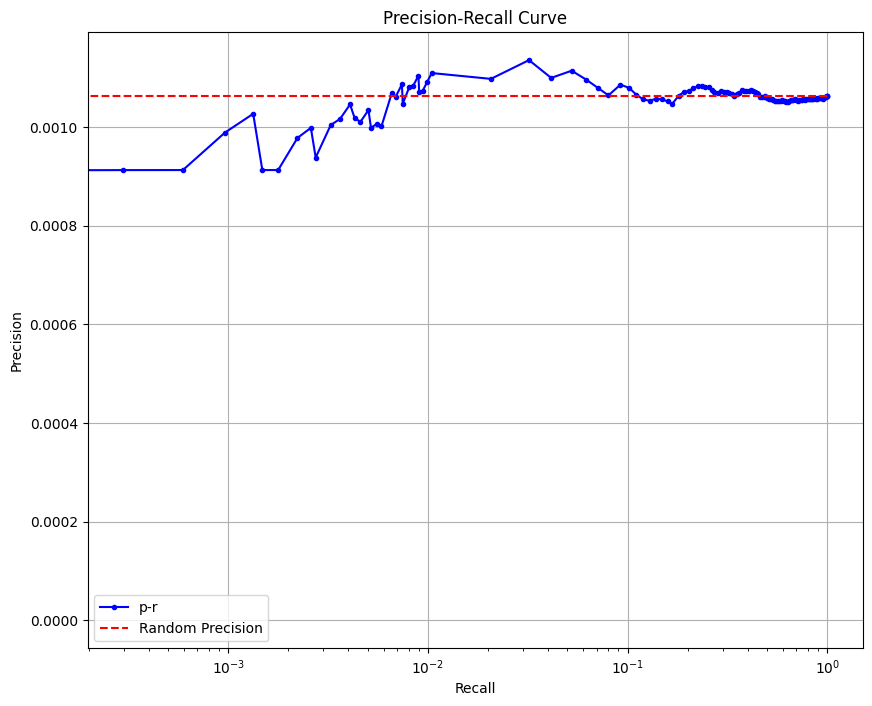

base enrichment
Top central genes: []


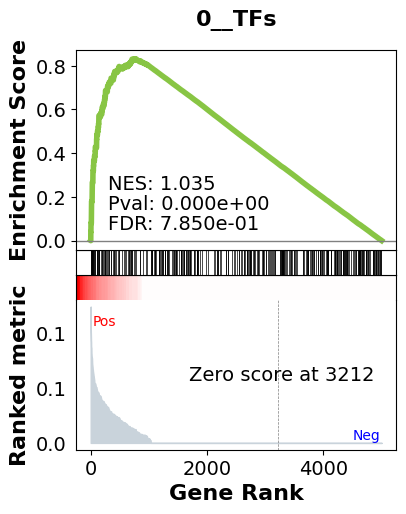

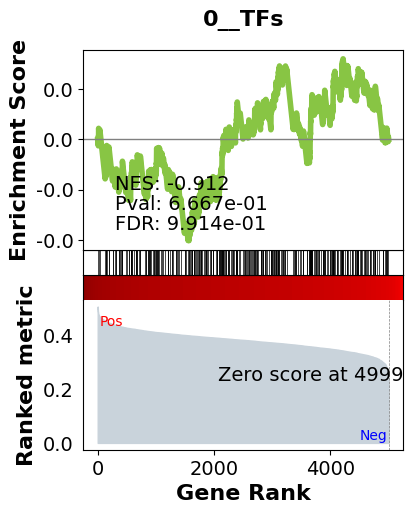

_________________________________________
TF specific enrichment
found some significant results for  2.9411764705882355 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3565 genes
intersection pct: 0.713
precision:  0.004536435786435786 
recall:  0.33543272080616476 
random precision: 0.001062203773751226


 97%|█████████▋| 124/128 [00:02<00:00, 44.54it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 43.89it/s]


Average Precision (AP):  0.0025229391415218755
Area Under Precision-Recall Curve (AUPRC):  0.002229334016195257
EPR: 4.852517453139257


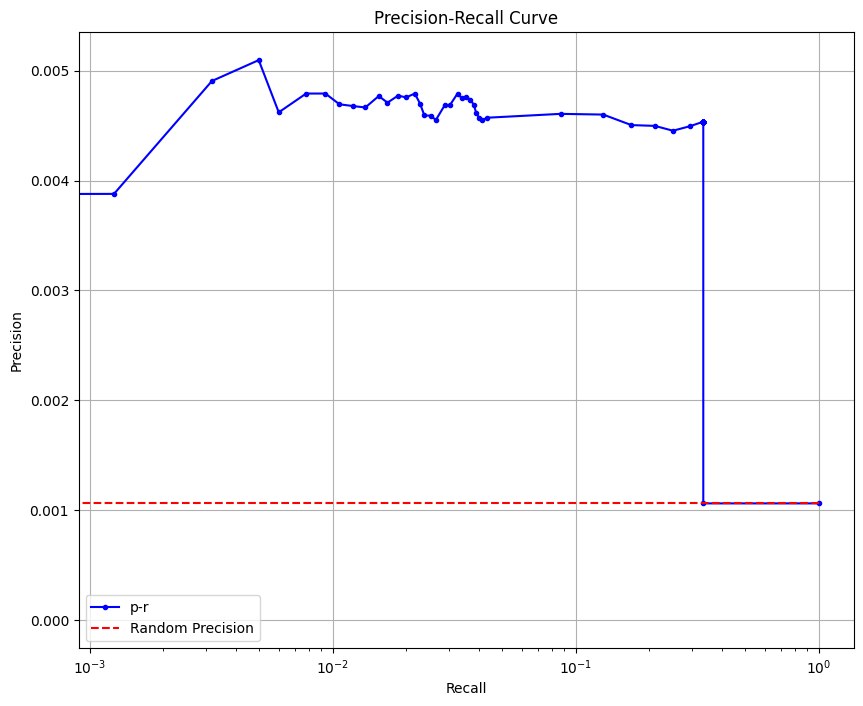

(4768, 23149)
AAK
save dir exist
epoch: 1 0.8266975730657578 mse_loss: 0.8013218939304352 kl_loss: 0.02498446175013669 sparse_loss: 0.000391204739571549
epoch: 2 0.8104057013988495 mse_loss: 0.7836555987596512 kl_loss: 0.02620973519515246 sparse_loss: 0.0005403391842264682
epoch: 4 0.42558664083480835 mse_loss: 0.3928454965353012 kl_loss: 0.03204553097020835 sparse_loss: 0.0006956120050745085
epoch: 5 0.38825223594903946 mse_loss: 0.35167939960956573 kl_loss: 0.03571553900837898 sparse_loss: 0.0008573046943638474
epoch: 7 0.1849515065550804 mse_loss: 0.14449557662010193 kl_loss: 0.039500179467722774 sparse_loss: 0.0009557438170304522
epoch: 8 0.17569037899374962 mse_loss: 0.13339548371732235 kl_loss: 0.04126342758536339 sparse_loss: 0.0010314633836969733
epoch: 10 0.14064134657382965 mse_loss: 0.09529784880578518 kl_loss: 0.044262214563786983 sparse_loss: 0.0010812782566063106
epoch: 11 0.14153573289513588 mse_loss: 0.09530407190322876 kl_loss: 0.045116156339645386 sparse_loss: 0.00111

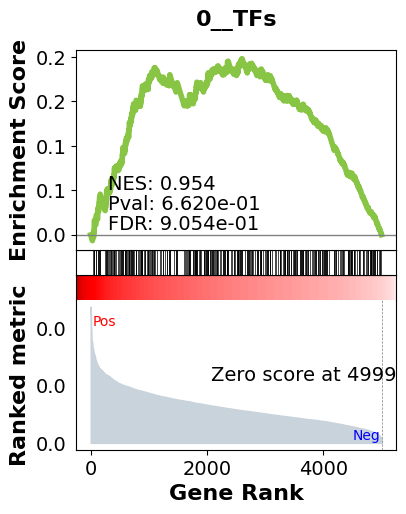

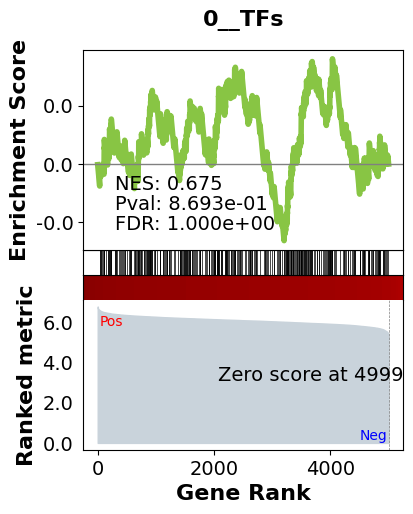

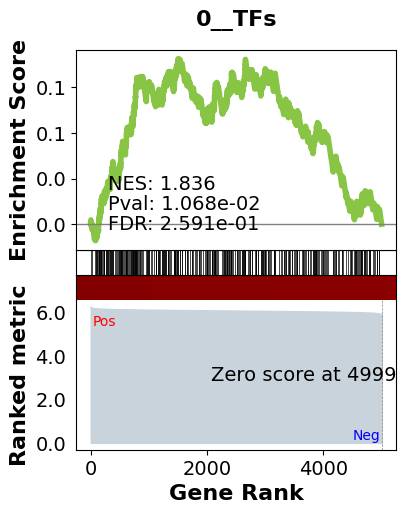

_________________________________________
TF specific enrichment
found some significant results for  2.5 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3514 genes
intersection pct: 0.7028
precision:  0.0012120198803014933 
recall:  0.9999331684822562 
random precision: 0.0012121008868434197


 98%|█████████▊| 125/128 [00:02<00:00, 46.39it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 49.02it/s]


Average Precision (AP):  0.0011995766209949976
Area Under Precision-Recall Curve (AUPRC):  0.0011993051174125767
EPR: 0.38538356087905107


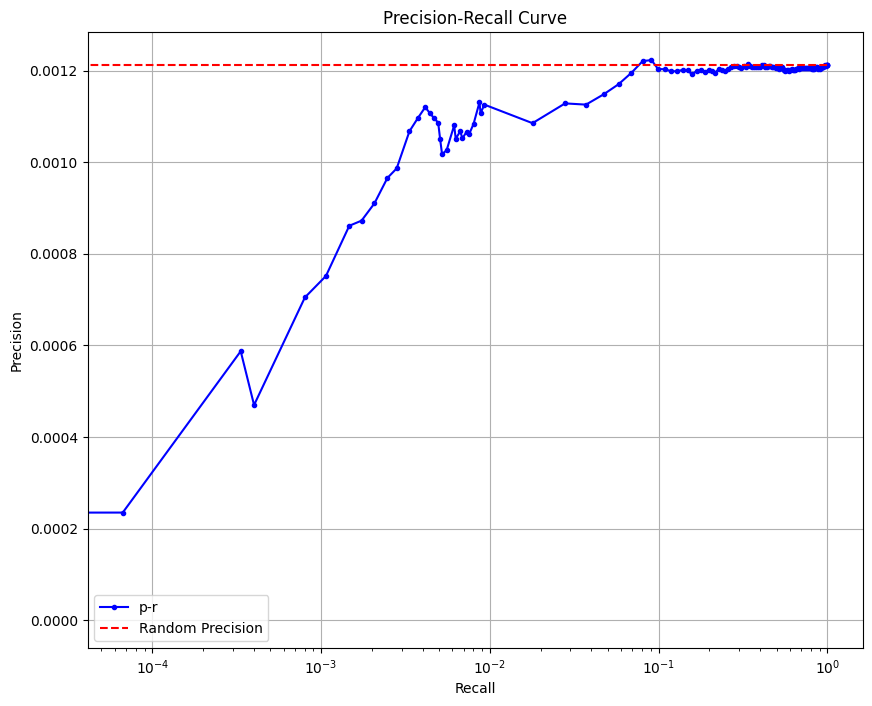

base enrichment
Top central genes: []


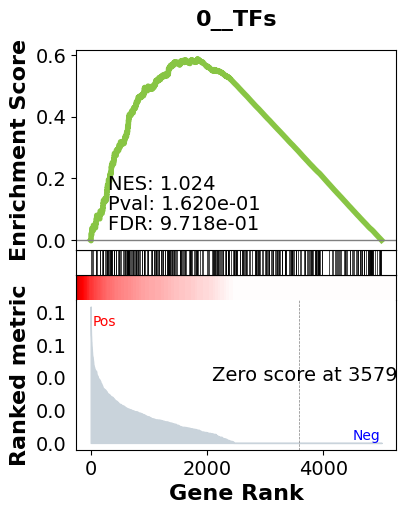

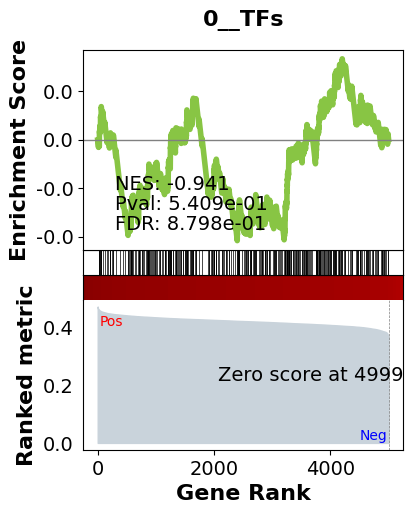

_________________________________________
TF specific enrichment
found some significant results for  2.5 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3514 genes
intersection pct: 0.7028
precision:  0.0060679381345478695 
recall:  0.4273875559713961 
random precision: 0.0012121008868434197


 95%|█████████▌| 122/128 [00:02<00:00, 47.81it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 49.52it/s]


Average Precision (AP):  0.0036837856736765835
Area Under Precision-Recall Curve (AUPRC):  0.0032457364827835
EPR: 4.5601415338289275


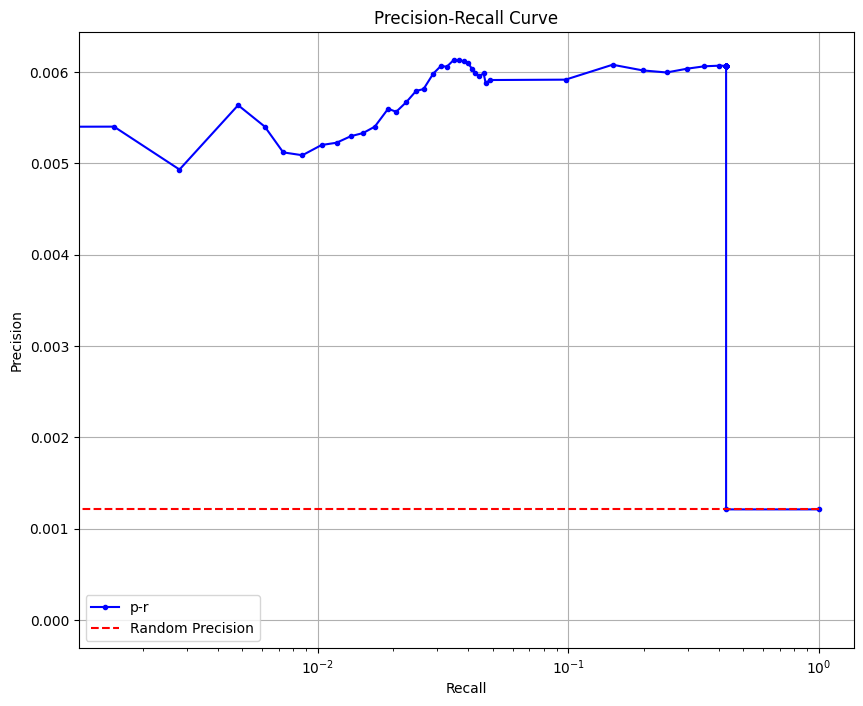

(4768, 23149)
Sf6
save dir exist
epoch: 1 0.9927411675453186 mse_loss: 0.9691113332907358 kl_loss: 0.023289179773807216 sparse_loss: 0.0003406283212825656
epoch: 2 0.982779453198115 mse_loss: 0.9590645333131155 kl_loss: 0.023312460233379777 sparse_loss: 0.0004024566781784718
epoch: 4 0.5562693377335867 mse_loss: 0.526464968919754 kl_loss: 0.029225982609204948 sparse_loss: 0.0005783723415030787
epoch: 5 0.5108311176300049 mse_loss: 0.476689154903094 kl_loss: 0.033355124605198704 sparse_loss: 0.0007868279935792089
epoch: 7 0.1739416867494583 mse_loss: 0.1328422004977862 kl_loss: 0.04018441618730625 sparse_loss: 0.000915065766700233
epoch: 8 0.1603903273741404 mse_loss: 0.11697314058740933 kl_loss: 0.04240684180210034 sparse_loss: 0.0010103378056858976
epoch: 10 0.13465691606203714 mse_loss: 0.08762539302309354 kl_loss: 0.04596683010458946 sparse_loss: 0.001064691013501336
epoch: 11 0.13386848320563635 mse_loss: 0.08595739056666692 kl_loss: 0.04681419239689907 sparse_loss: 0.0010968958764

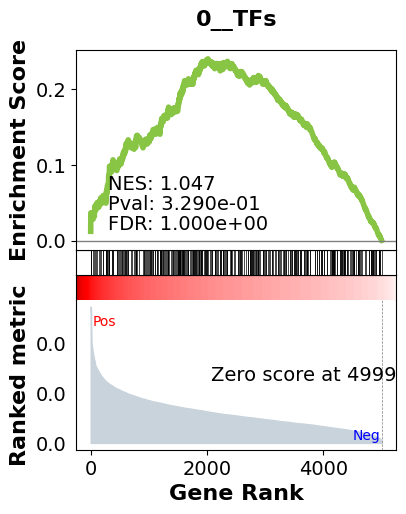

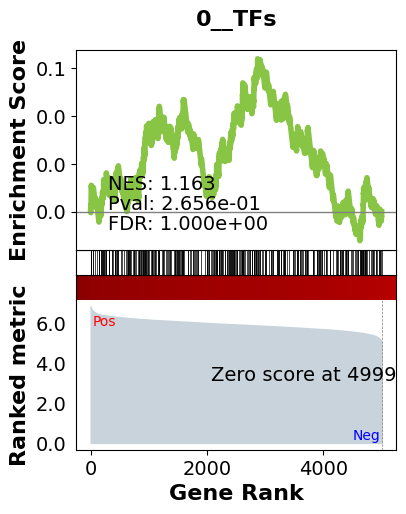

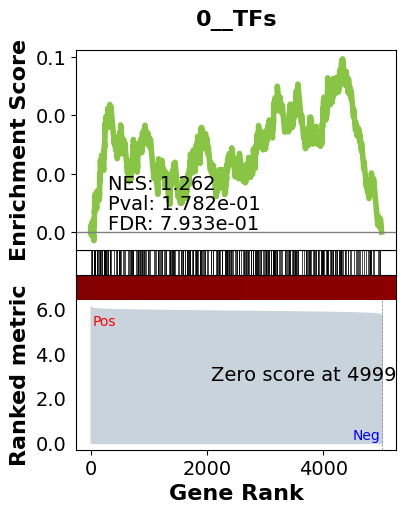

_________________________________________
TF specific enrichment
found some significant results for  5.714285714285714 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3594 genes
intersection pct: 0.7188
precision:  0.0013617804111469452 
recall:  0.9998862796383693 
random precision: 0.0013619352909207464


 97%|█████████▋| 124/128 [00:02<00:00, 43.56it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:03<00:00, 42.64it/s]


Average Precision (AP):  0.0013574306432992287
Area Under Precision-Recall Curve (AUPRC):  0.001356329848664844
EPR: 0.709180336949624


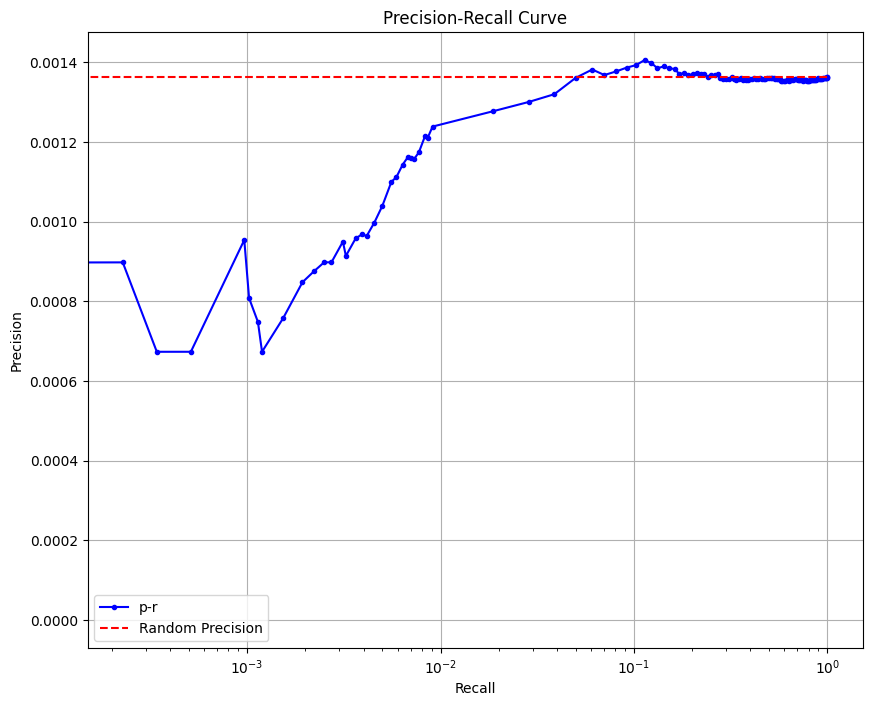

base enrichment
Top central genes: []


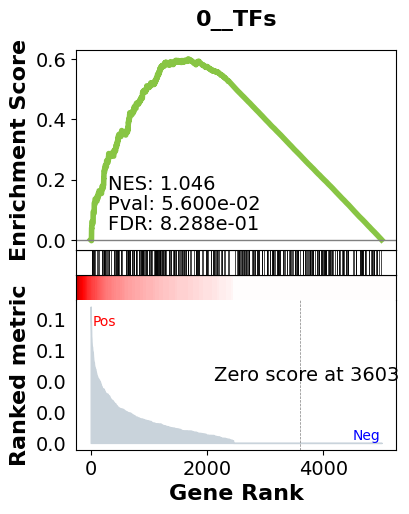

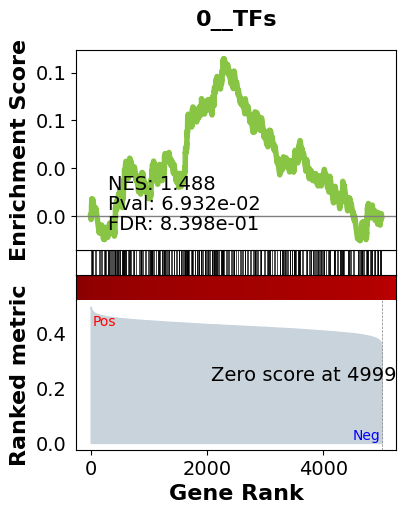

_________________________________________
TF specific enrichment
found some significant results for  4.285714285714286 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3594 genes
intersection pct: 0.7188
precision:  0.0069856273237848526 
recall:  0.4452720759652016 
random precision: 0.0013619352909207464


 98%|█████████▊| 126/128 [00:02<00:00, 44.58it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 44.44it/s]


Average Precision (AP):  0.004358306982313251
Area Under Precision-Recall Curve (AUPRC):  0.0038786465264570224
EPR: 5.279307692770863


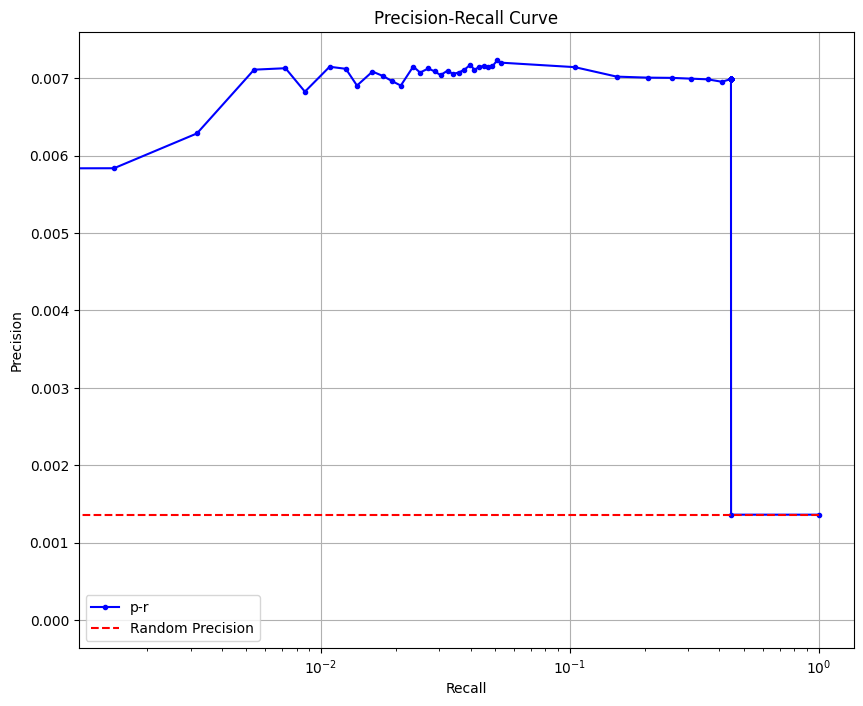

(4768, 23149)
tpP
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:49: RuntimeWarning: Mean of empty slice.
  means.append(tmp[tmp != 0].mean())
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/Documents code/scPRINT/note

epoch: 1 1.0026452541351318 mse_loss: 0.9791397452354431 kl_loss: 0.02320559292274993 sparse_loss: 0.0002999811840709299
epoch: 2 1.0029410123825073 mse_loss: 0.97944176197052 kl_loss: 0.023208845290355384 sparse_loss: 0.00029043457470834255
epoch: 4 0.9999130368232727 mse_loss: 0.9764453172683716 kl_loss: 0.023162934390711598 sparse_loss: 0.00030474801314994693
epoch: 5 0.9995445013046265 mse_loss: 0.9760597944259644 kl_loss: 0.023171406428446062 sparse_loss: 0.0003132960991933942
epoch: 7 0.9987131357192993 mse_loss: 0.975239098072052 kl_loss: 0.02315559501585085 sparse_loss: 0.00031839022994972765
epoch: 8 0.9991790652275085 mse_loss: 0.9757146835327148 kl_loss: 0.023141531382862013 sparse_loss: 0.00032282492611557245
epoch: 10 0.9979445338249207 mse_loss: 0.9744781851768494 kl_loss: 0.023140449811762664 sparse_loss: 0.0003258716897107661
epoch: 11 0.9977951049804688 mse_loss: 0.9743111729621887 kl_loss: 0.02315348449337762 sparse_loss: 0.00033046636963263154
epoch: 13 0.99620687961

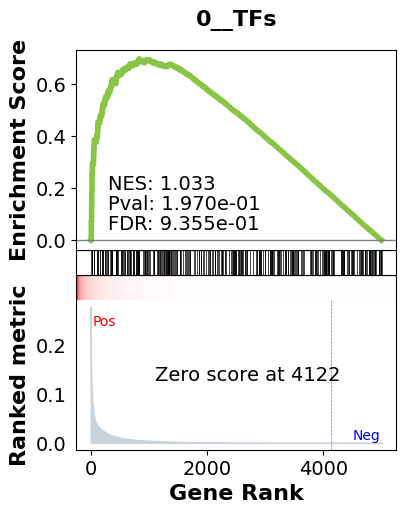

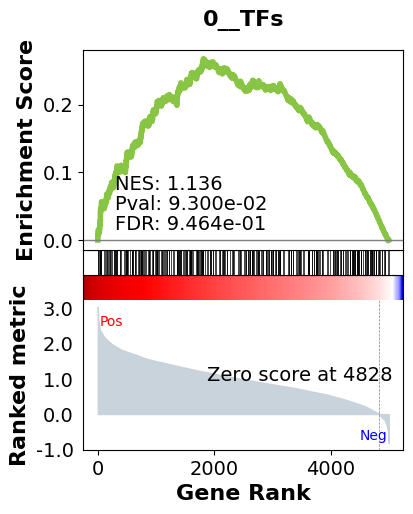

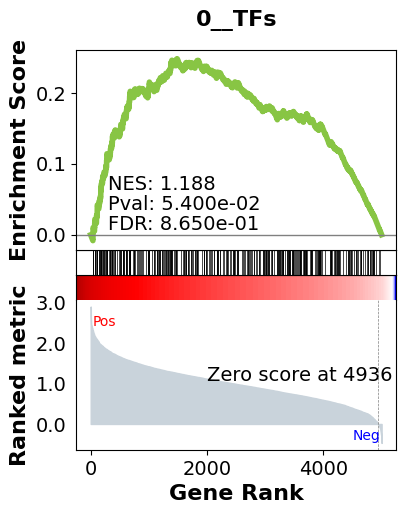

_________________________________________
TF specific enrichment
found some significant results for  4.545454545454546 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3199 genes
intersection pct: 0.6398
precision:  0.0010710234065093435 
recall:  0.9999087424712538 
random precision: 0.0010711211543788797


 97%|█████████▋| 124/128 [00:01<00:00, 64.68it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 62.10it/s]


Average Precision (AP):  0.0010493663160537304
Area Under Precision-Recall Curve (AUPRC):  0.0010483636322143476
EPR: 0.6811196764037447


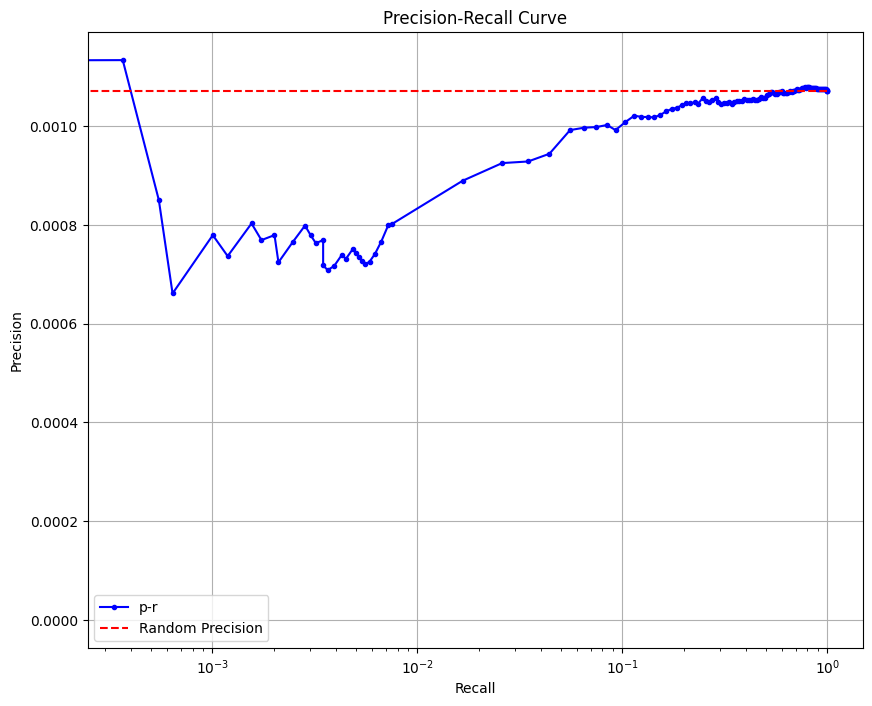

base enrichment
Top central genes: []


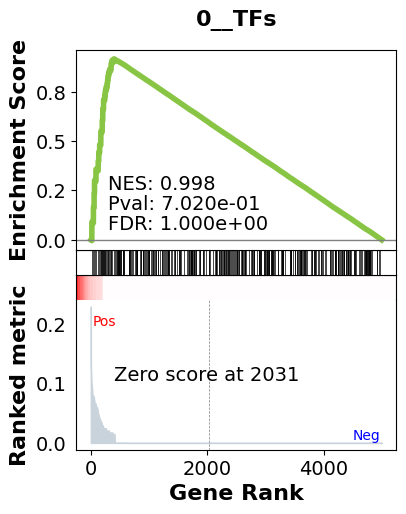

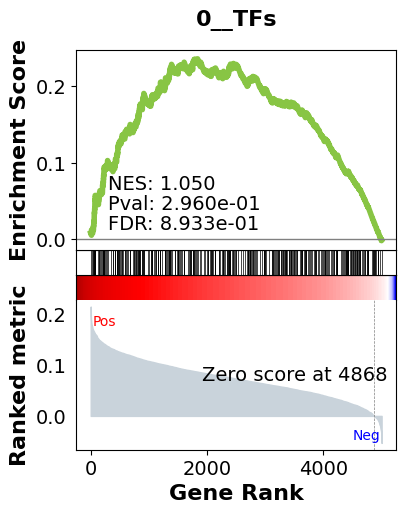

_________________________________________
TF specific enrichment
found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3199 genes
intersection pct: 0.6398
precision:  0.006103856856844252 
recall:  0.5308450447161891 
random precision: 0.0010711211543788797


 98%|█████████▊| 126/128 [00:01<00:00, 63.93it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 63.84it/s]


Average Precision (AP):  0.0028240594979066364
Area Under Precision-Recall Curve (AUPRC):  0.002737543886953402
EPR: 3.4256015827289317


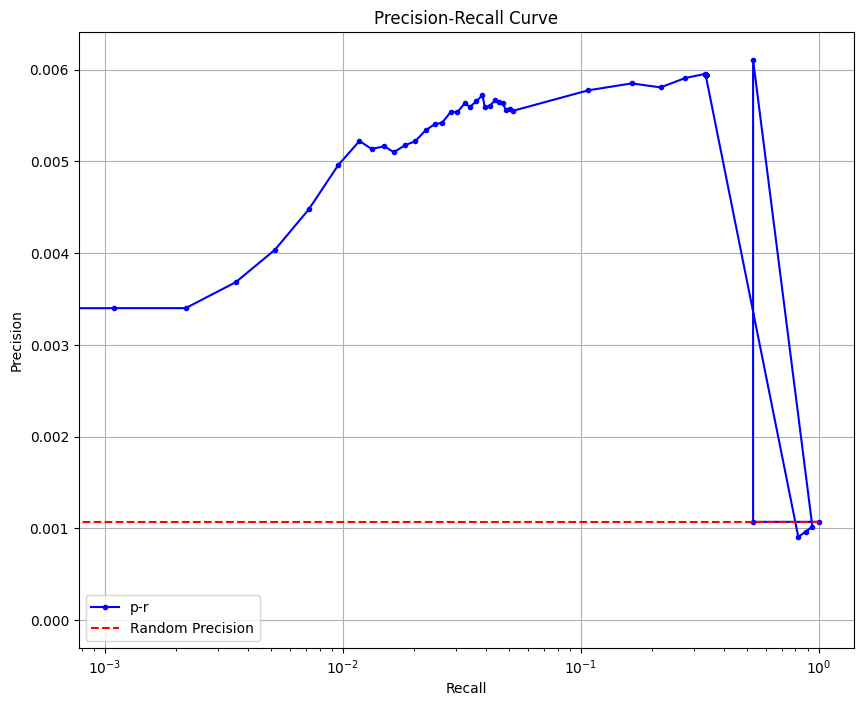

(4768, 23149)
Fzq
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:49: RuntimeWarning: Mean of empty slice.
  means.append(tmp[tmp != 0].mean())
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/Documents code/scPRINT/note

epoch: 1 0.9519683122634888 mse_loss: 0.9280565977096558 kl_loss: 0.023567408439703286 sparse_loss: 0.00034428268554620445
epoch: 2 0.9607377797365189 mse_loss: 0.9365525245666504 kl_loss: 0.02376460396044422 sparse_loss: 0.00042063249566126615
epoch: 4 0.715102031826973 mse_loss: 0.6874019354581833 kl_loss: 0.0271648857742548 sparse_loss: 0.0005351846484700218
epoch: 5 0.695990577340126 mse_loss: 0.665439248085022 kl_loss: 0.029869063524529338 sparse_loss: 0.0006822578143328428
epoch: 7 0.3541727140545845 mse_loss: 0.3174532875418663 kl_loss: 0.035929454024881124 sparse_loss: 0.000789984711445868
epoch: 8 0.343914695084095 mse_loss: 0.3046691492199898 kl_loss: 0.03836282039992511 sparse_loss: 0.0008827293931972235
epoch: 10 0.21374239772558212 mse_loss: 0.17046639695763588 kl_loss: 0.04233537847176194 sparse_loss: 0.0009406206372659653
epoch: 11 0.2080310545861721 mse_loss: 0.16350087895989418 kl_loss: 0.04354649456217885 sparse_loss: 0.0009836722165346146
epoch: 13 0.1741395629942417

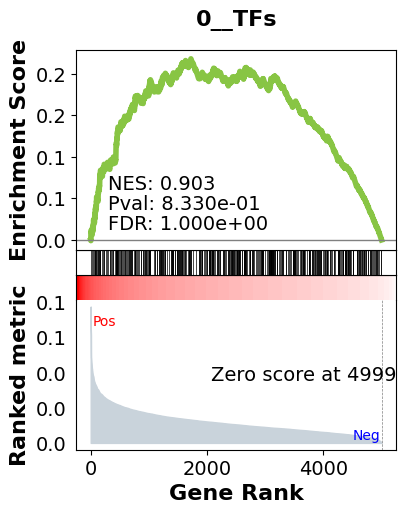

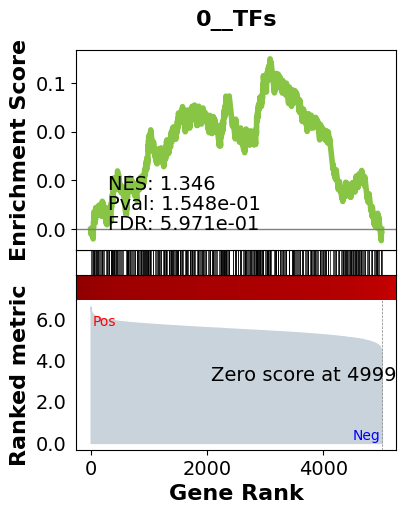

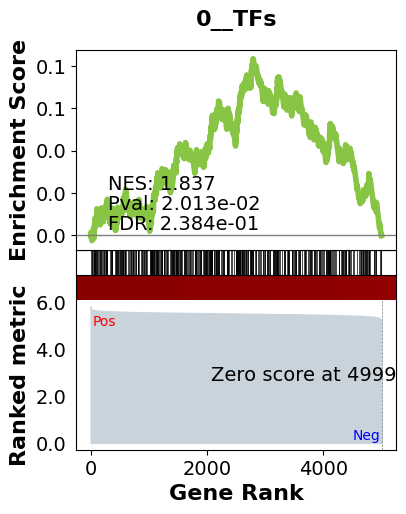

_________________________________________
TF specific enrichment
found some significant results for  1.7857142857142858 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3625 genes
intersection pct: 0.725
precision:  0.001671842886503768 
recall:  0.9999089460505349 
random precision: 0.0016719951282636828


 98%|█████████▊| 125/128 [00:03<00:00, 39.91it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:03<00:00, 41.02it/s]


Average Precision (AP):  0.0016631920663059507
Area Under Precision-Recall Curve (AUPRC):  0.0016627701028790669
EPR: 0.8163726791067689


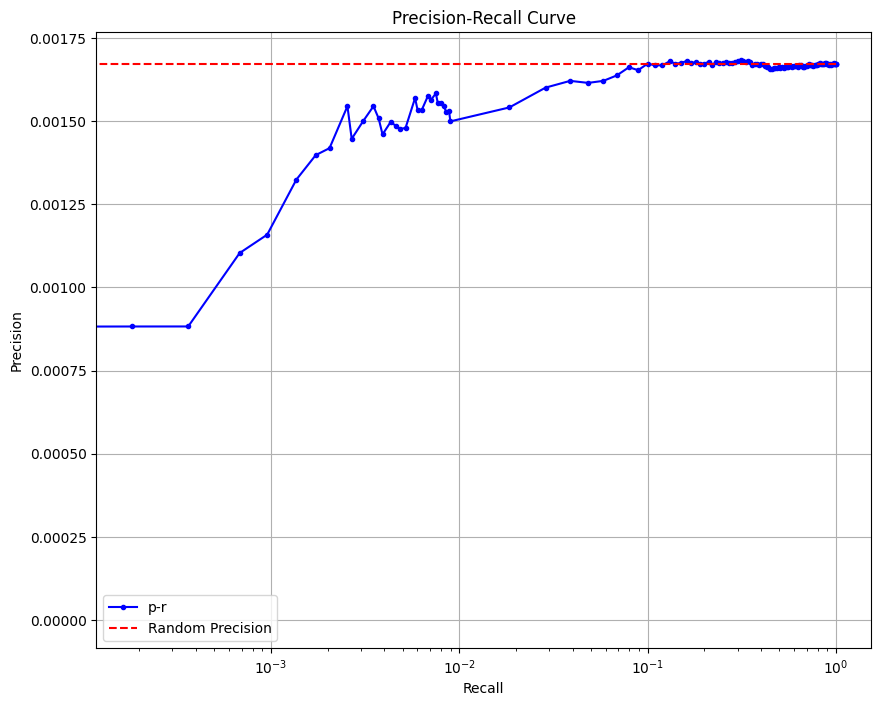

base enrichment
Top central genes: []


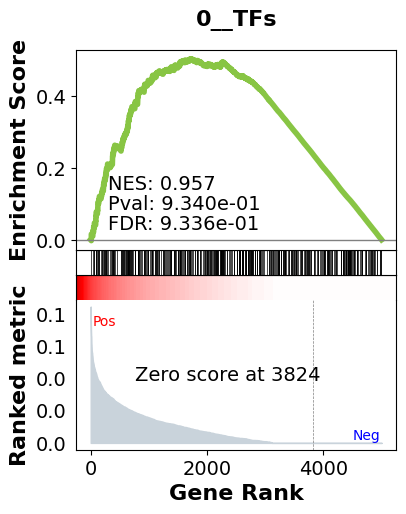

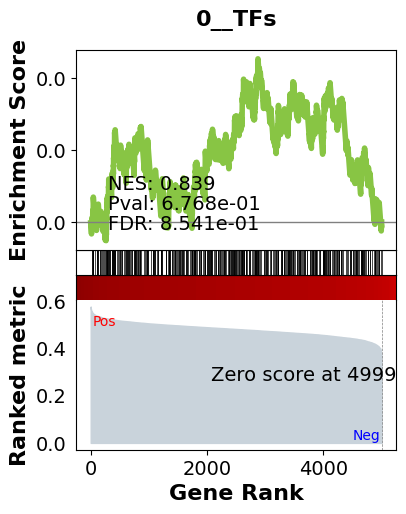

_________________________________________
TF specific enrichment
found some significant results for  3.5714285714285716 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3625 genes
intersection pct: 0.725
precision:  0.007844427463632762 
recall:  0.5047575688595493 
random precision: 0.0016719951282636828


 98%|█████████▊| 125/128 [00:02<00:00, 42.61it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:03<00:00, 42.47it/s]


Average Precision (AP):  0.005257858634417801
Area Under Precision-Recall Curve (AUPRC):  0.004758426689429732
EPR: 3.9318158367362543


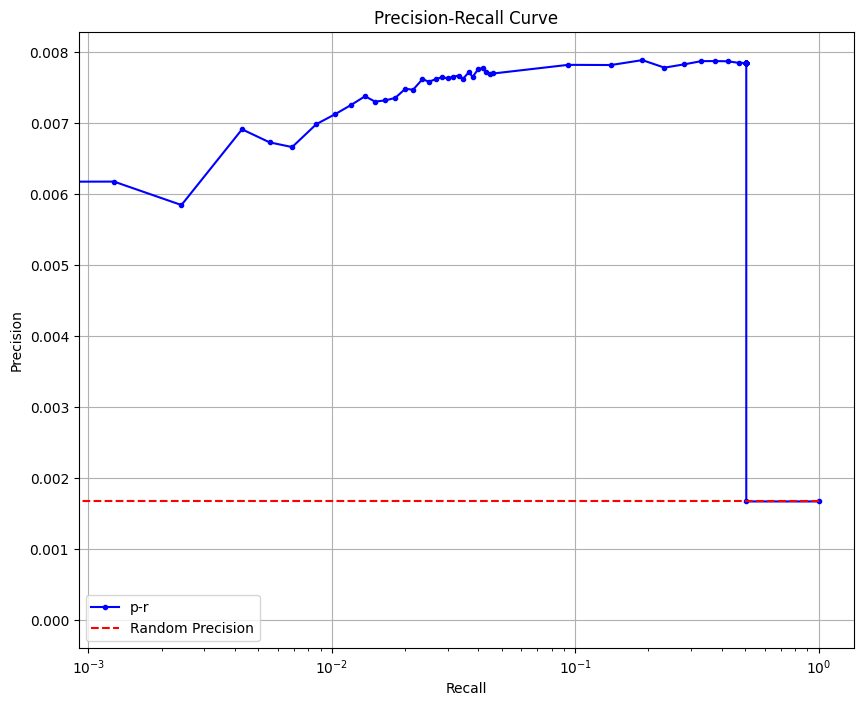

(4768, 23149)
FL9
save dir exist
epoch: 1 0.9900606175263723 mse_loss: 0.966406504313151 kl_loss: 0.023324131485424004 sparse_loss: 0.0003299814270576462
epoch: 2 0.9904012282689413 mse_loss: 0.9666879971822103 kl_loss: 0.02333305938130555 sparse_loss: 0.0003801390848821029
epoch: 4 0.6994746426741282 mse_loss: 0.6721657415231069 kl_loss: 0.026803103896478813 sparse_loss: 0.0005057647261613359
epoch: 5 0.6628935237725576 mse_loss: 0.6328050891558329 kl_loss: 0.029411050723865628 sparse_loss: 0.0006773768982384354
epoch: 7 0.24482258905967078 mse_loss: 0.2054418077071508 kl_loss: 0.038571149886896215 sparse_loss: 0.0008096345409285277
epoch: 8 0.2302068993449211 mse_loss: 0.1878493403395017 kl_loss: 0.04144652932882309 sparse_loss: 0.0009110256796702743
epoch: 10 0.14773560563723245 mse_loss: 0.10205069308479627 kl_loss: 0.044714792631566525 sparse_loss: 0.0009701144008431584
epoch: 11 0.15307130167881647 mse_loss: 0.10600364208221436 kl_loss: 0.0460569898908337 sparse_loss: 0.001010666

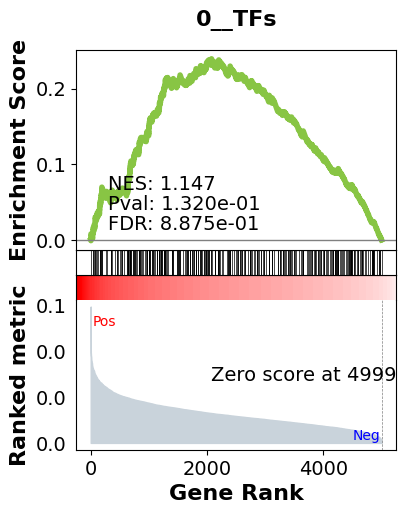

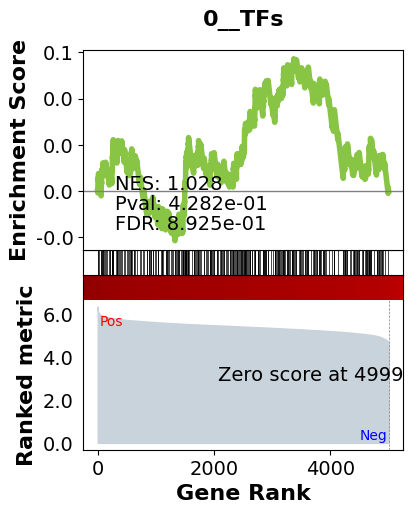

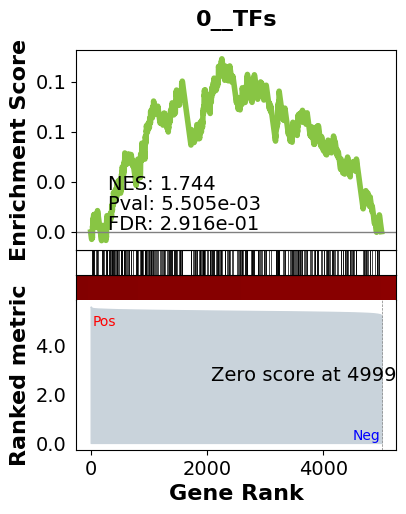

_________________________________________
TF specific enrichment
found some significant results for  4.25531914893617 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3603 genes
intersection pct: 0.7206
precision:  0.0015181068647987987 
recall:  0.9999492463076689 
random precision: 0.001518183918238287


 98%|█████████▊| 125/128 [00:02<00:00, 44.50it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 45.82it/s]


Average Precision (AP):  0.0015292704111747359
Area Under Precision-Recall Curve (AUPRC):  0.0015285305636108652
EPR: 0.7348799242950723


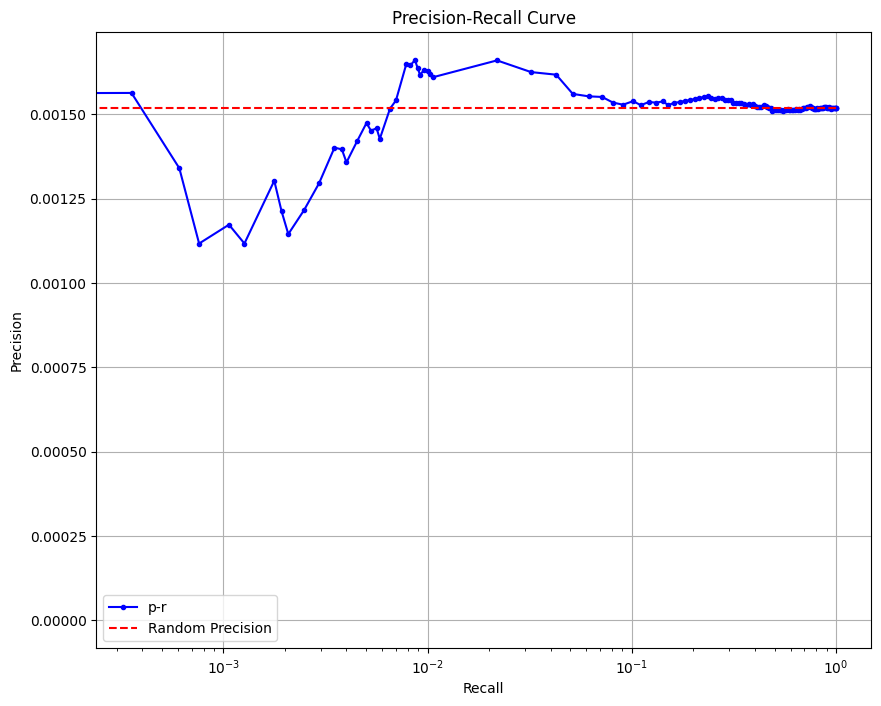

base enrichment
PowerIterationFailedConvergence


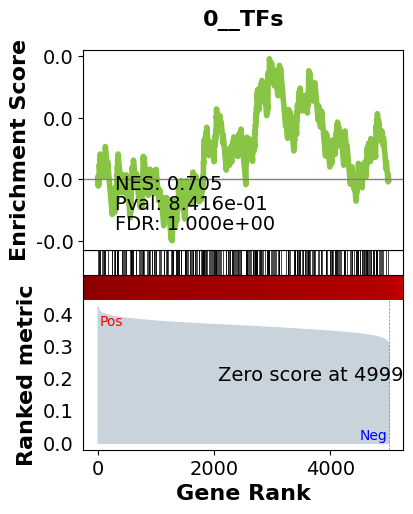

_________________________________________
TF specific enrichment
found some significant results for  2.127659574468085 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3603 genes
intersection pct: 0.7206
precision:  0.008508786409952429 
recall:  0.46043749682789425 
random precision: 0.001518183918238287


 98%|█████████▊| 125/128 [00:02<00:00, 42.62it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 43.99it/s]


Average Precision (AP):  0.005296479257115724
Area Under Precision-Recall Curve (AUPRC):  0.004750937495680079
EPR: 6.179604215495202


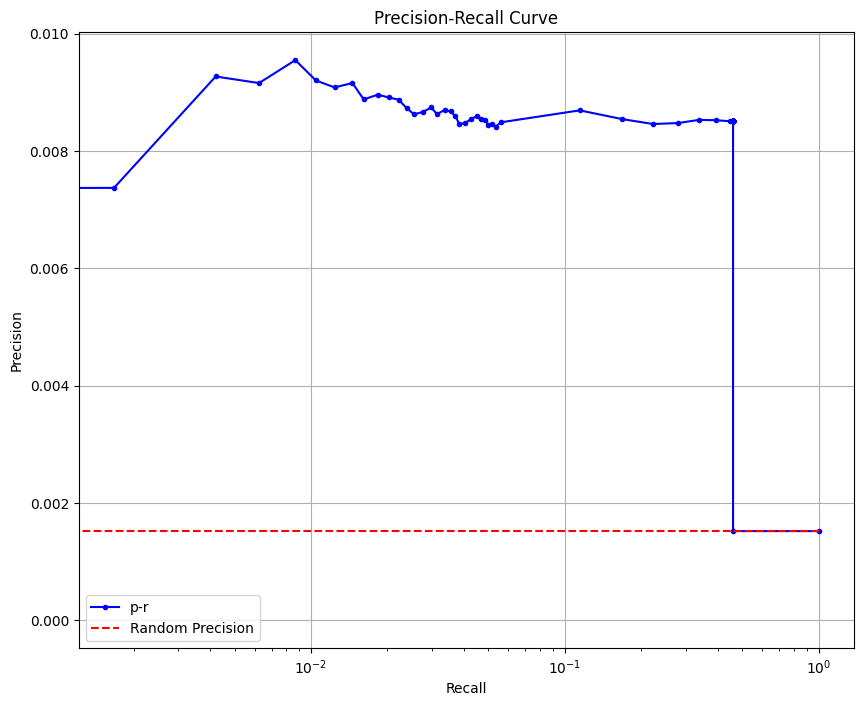

(4768, 23149)
tTV
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:49: RuntimeWarning: Mean of empty slice.
  means.append(tmp[tmp != 0].mean())
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/Documents code/scPRINT/note

epoch: 1 1.0161421298980713 mse_loss: 0.9927392601966858 kl_loss: 0.023102952480257954 sparse_loss: 0.00029997291858308017
epoch: 2 1.0160800218582153 mse_loss: 0.9927119612693787 kl_loss: 0.023083251224306878 sparse_loss: 0.00028475665021687746
epoch: 4 0.99200838804245 mse_loss: 0.9686230421066284 kl_loss: 0.023088061781891156 sparse_loss: 0.0002972207439597696
epoch: 5 0.9921084642410278 mse_loss: 0.9687193632125854 kl_loss: 0.023092514602467418 sparse_loss: 0.00029657577397301793
epoch: 7 0.985772430896759 mse_loss: 0.9623985290527344 kl_loss: 0.023077998779626796 sparse_loss: 0.0002959033299703151
epoch: 8 0.986225426197052 mse_loss: 0.9628469944000244 kl_loss: 0.023078127116605174 sparse_loss: 0.00030027530738152564
epoch: 10 0.9801256656646729 mse_loss: 0.9566975235939026 kl_loss: 0.02312411727325525 sparse_loss: 0.0003039754810743034
epoch: 11 0.9804179668426514 mse_loss: 0.956989586353302 kl_loss: 0.02312152822560165 sparse_loss: 0.0003068268997594714
epoch: 13 0.9677464962005

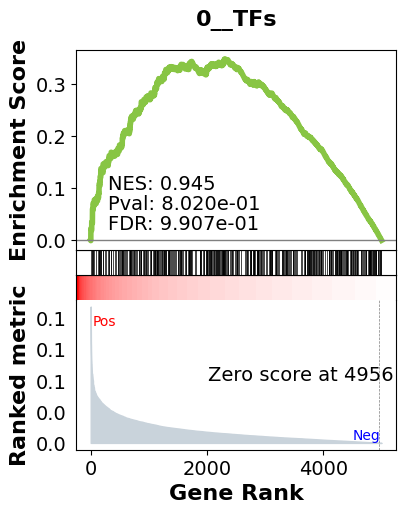

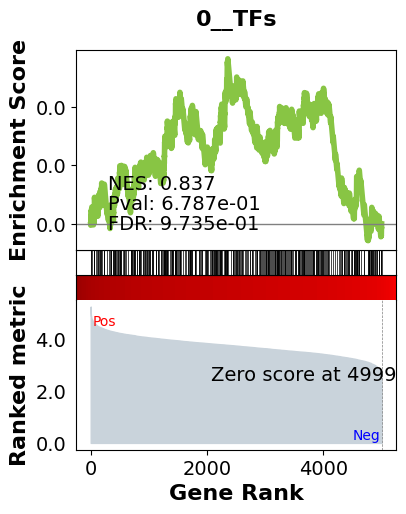

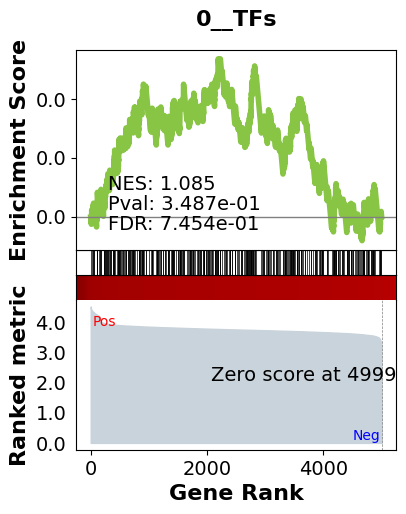

_________________________________________
TF specific enrichment
found some significant results for  9.75609756097561 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3553 genes
intersection pct: 0.7106
precision:  0.001303380850594473 
recall:  0.999878426843353 
random precision: 0.0013035393259851465


 98%|█████████▊| 126/128 [00:02<00:00, 47.35it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 46.33it/s]


Average Precision (AP):  0.001287392763439863
Area Under Precision-Recall Curve (AUPRC):  0.0012869086854828263
EPR: 0.7456165926950478


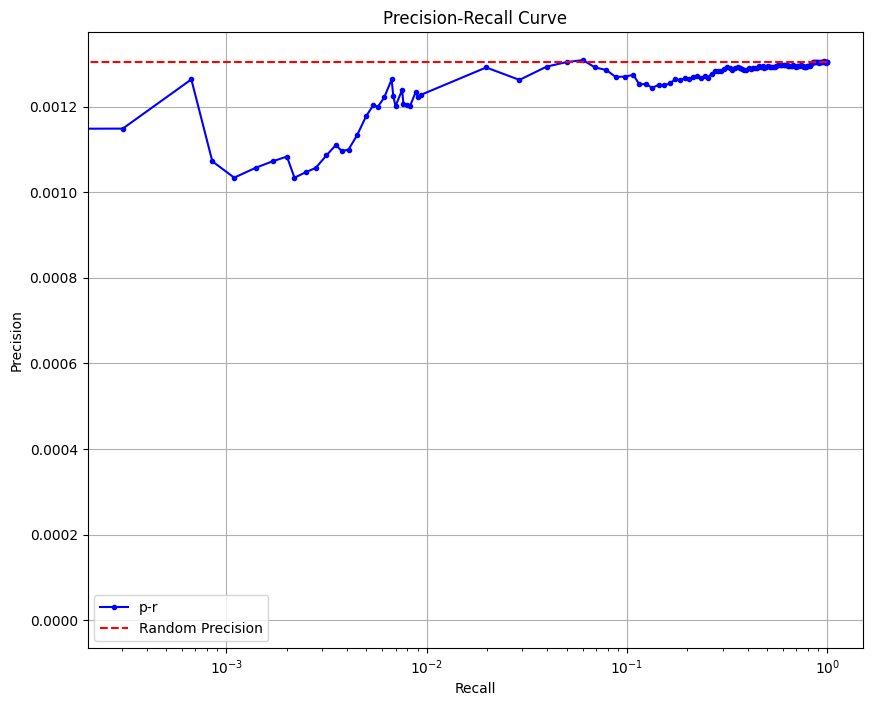

base enrichment
Top central genes: []


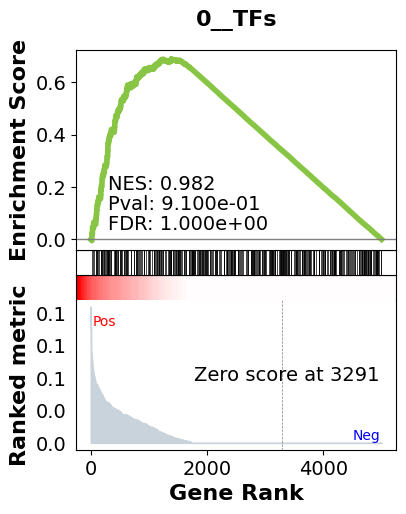

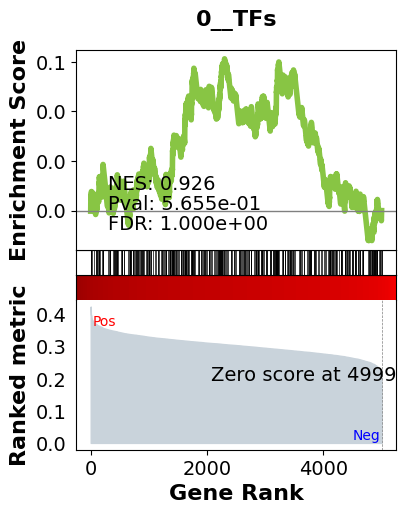

_________________________________________
TF specific enrichment
found some significant results for  0.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3553 genes
intersection pct: 0.7106
precision:  0.006835811456155296 
recall:  0.5151054647133912 
random precision: 0.0013035393259851465


 97%|█████████▋| 124/128 [00:02<00:00, 44.05it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 43.83it/s]


Average Precision (AP):  0.004462456314774473
Area Under Precision-Recall Curve (AUPRC):  0.004076542407087334
EPR: 4.8511641097480425


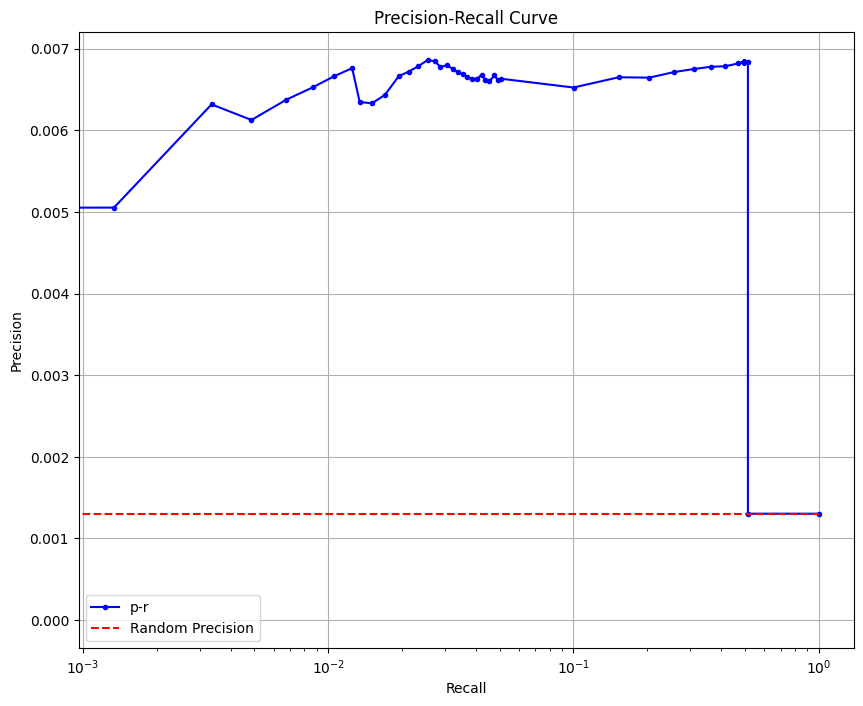

(4768, 23149)
Iu3
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:49: RuntimeWarning: Mean of empty slice.
  means.append(tmp[tmp != 0].mean())
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/Documents code/scPRINT/note

epoch: 1 1.0946915447711945 mse_loss: 1.0713478028774261 kl_loss: 0.023084767400177952 sparse_loss: 0.0002589729701867327
epoch: 2 1.0255525708198547 mse_loss: 1.0021983981132507 kl_loss: 0.023073104324794258 sparse_loss: 0.00028106762329116464
epoch: 4 1.0424734950065613 mse_loss: 1.019095316529274 kl_loss: 0.023086921110007097 sparse_loss: 0.0002912351774284616
epoch: 5 0.9511864185333252 mse_loss: 0.9277991354465485 kl_loss: 0.02308960596928955 sparse_loss: 0.00029765132057946175
epoch: 7 0.8732562214136124 mse_loss: 0.849812850356102 kl_loss: 0.023137723288527923 sparse_loss: 0.000305609057249967
epoch: 8 0.9191267192363739 mse_loss: 0.8956553936004639 kl_loss: 0.02315145795000717 sparse_loss: 0.00031983722874429077
epoch: 10 0.8796453773975372 mse_loss: 0.8556669056415558 kl_loss: 0.023622865221113898 sparse_loss: 0.00035559202660806477
epoch: 11 0.8365330100059509 mse_loss: 0.8123013228178024 kl_loss: 0.02381539435009472 sparse_loss: 0.00041626147140050307
epoch: 13 0.76234950125

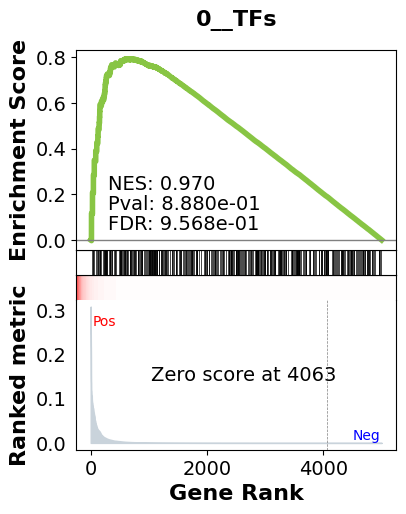

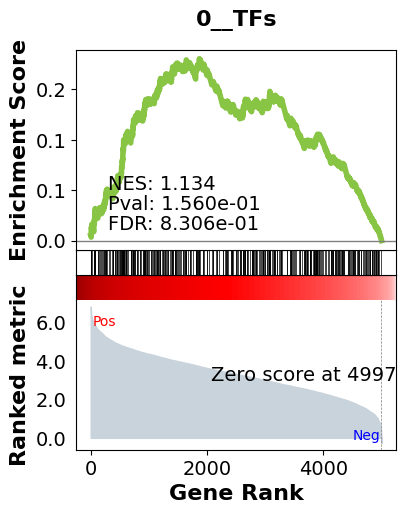

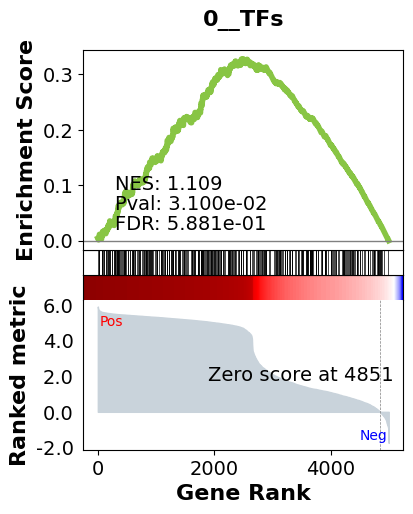

_________________________________________
TF specific enrichment
found some significant results for  57.142857142857146 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2606 genes
intersection pct: 0.5212
precision:  0.0010716447943104868 
recall:  1.0 
random precision: 0.0010716447943104868


 97%|█████████▋| 124/128 [00:01<00:00, 85.43it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 83.91it/s]


Average Precision (AP):  0.0012615069441402561
Area Under Precision-Recall Curve (AUPRC):  0.00126092287582829
EPR: 0.8976746742151799


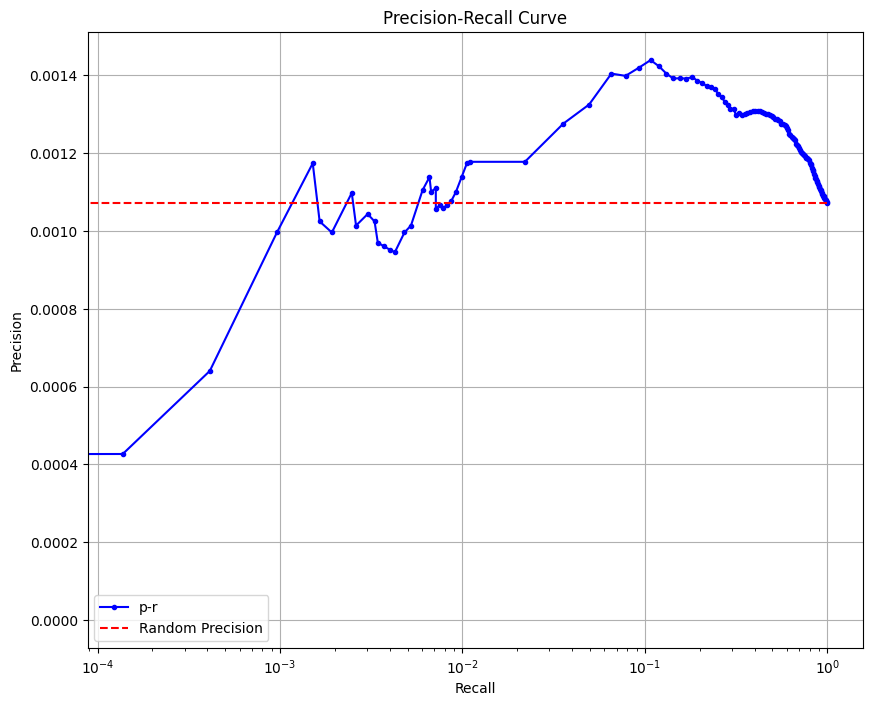

base enrichment
Top central genes: []


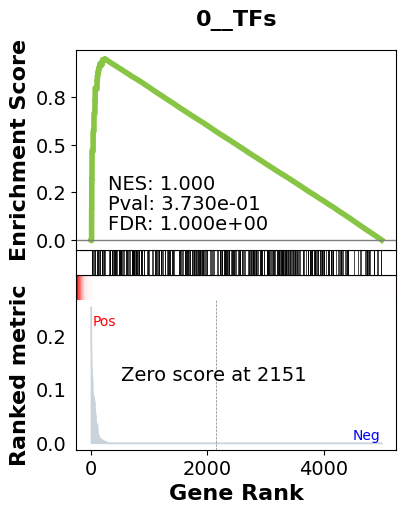

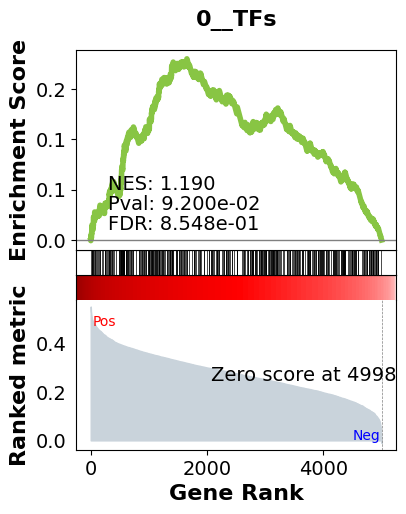

_________________________________________
TF specific enrichment
found some significant results for  4.761904761904762 % TFs

_________________________________________
loading GT,  omnipath
intersection of 2606 genes
intersection pct: 0.5212
precision:  0.005195060472215156 
recall:  0.6175945017182131 
random precision: 0.0010716447943104868


 95%|█████████▍| 121/128 [00:01<00:00, 86.05it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:01<00:00, 86.95it/s]


Average Precision (AP):  0.00476585748770631
Area Under Precision-Recall Curve (AUPRC):  0.004702650925015026
EPR: 6.751834197406032


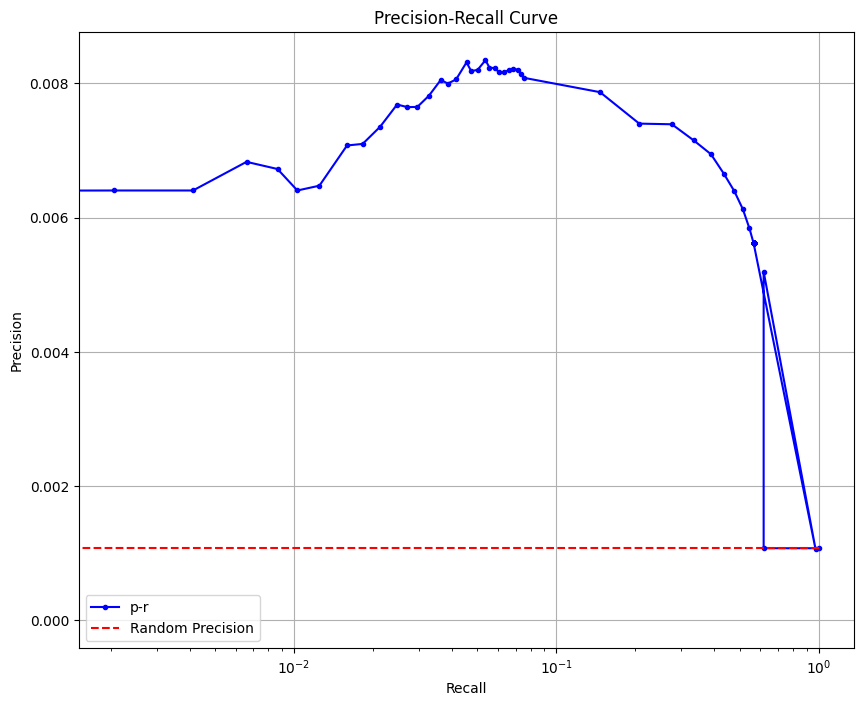

(4768, 23149)
FBs
save dir exist


/home/ml4ig1/Documents code/scPRINT/notebooks/../tools/DeepSEM/src/DeepSEM_cell_type_test_specific_GRN_model.py:49: RuntimeWarning: Mean of empty slice.
  means.append(tmp[tmp != 0].mean())
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:129: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:206: RuntimeWarning: Degrees of freedom <= 0 for slice
  ret = _var(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:163: RuntimeWarning: invalid value encountered in divide
  arrmean = um.true_divide(arrmean, div, out=arrmean,
/home/ml4ig1/miniconda3/envs/scprint/lib/python3.10/site-packages/numpy/core/_methods.py:198: RuntimeWarning: invalid value encountered in divide
  ret = ret.dtype.type(ret / rcount)
/home/ml4ig1/Documents code/scPRINT/note

epoch: 1 0.9914571245511373 mse_loss: 0.9678160945574442 kl_loss: 0.023331056135551382 sparse_loss: 0.0003099685612445076
epoch: 2 0.9918094078699747 mse_loss: 0.9681079785029093 kl_loss: 0.0233532096996593 sparse_loss: 0.000348247781706353
epoch: 4 0.8894990483919779 mse_loss: 0.8648091952006022 kl_loss: 0.024290948136088748 sparse_loss: 0.00039889484954377014
epoch: 5 0.8762635389963785 mse_loss: 0.8510506749153137 kl_loss: 0.024737836366208892 sparse_loss: 0.0004749657236970961
epoch: 7 0.6546003023783366 mse_loss: 0.6261199514071146 kl_loss: 0.027914129042377073 sparse_loss: 0.0005661765268693367
epoch: 8 0.6288865208625793 mse_loss: 0.5980187654495239 kl_loss: 0.030178794947763283 sparse_loss: 0.0006889333405221502
epoch: 10 0.40616923570632935 mse_loss: 0.3709258735179901 kl_loss: 0.03445970080792904 sparse_loss: 0.0007836709652716914
epoch: 11 0.3889414270718892 mse_loss: 0.35156770547231037 kl_loss: 0.036503490060567856 sparse_loss: 0.0008702448879679044
epoch: 13 0.28310239315

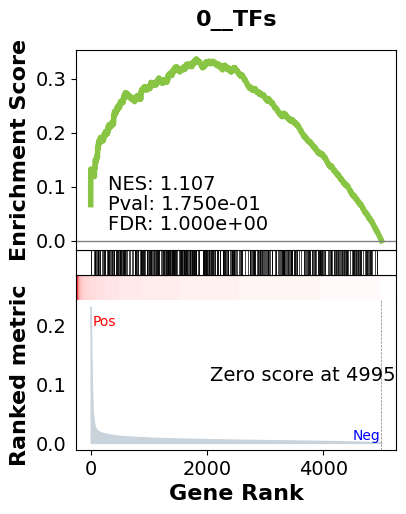

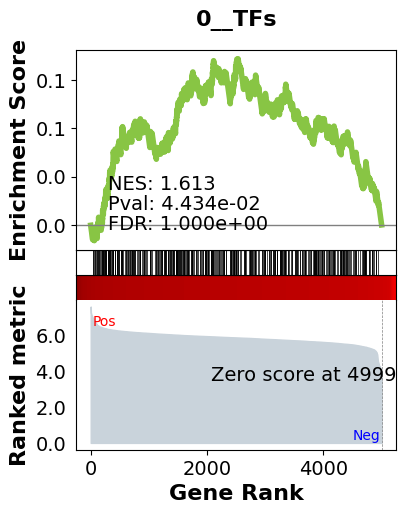

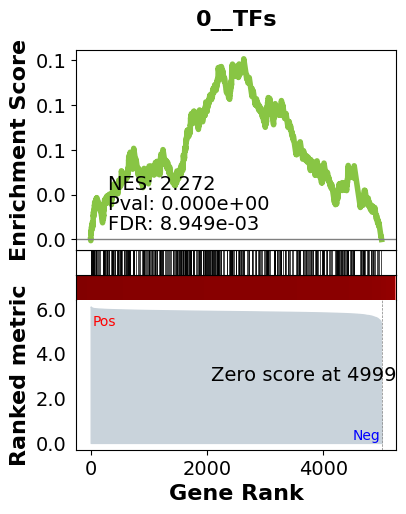

_________________________________________
TF specific enrichment
found some significant results for  6.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3540 genes
intersection pct: 0.708
precision:  0.001500791024308632 
recall:  0.9998936396511381 
random precision: 0.0015009506659450864


 98%|█████████▊| 125/128 [00:02<00:00, 44.71it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 44.97it/s]


Average Precision (AP):  0.00150001115078922
Area Under Precision-Recall Curve (AUPRC):  0.001498621022859112
EPR: 1.3121740879661798


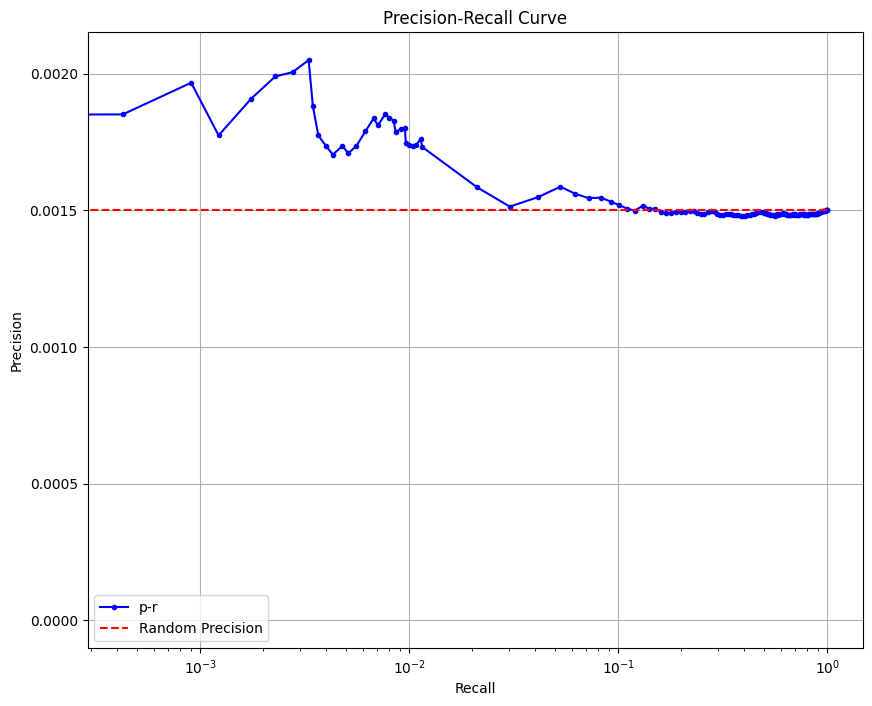

base enrichment
Top central genes: []


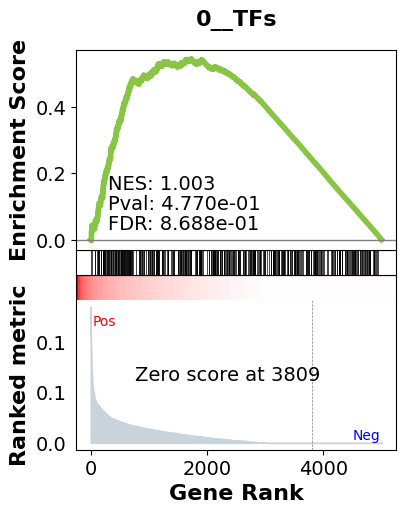

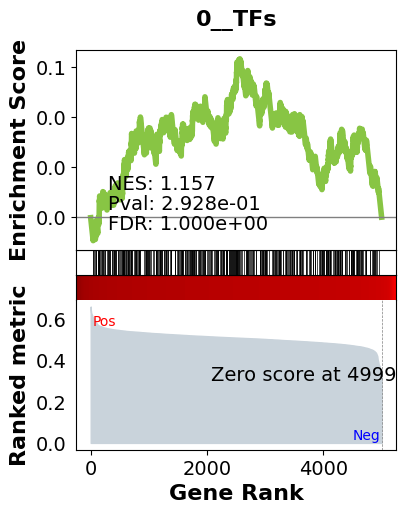

_________________________________________
TF specific enrichment
found some significant results for  4.0 % TFs

_________________________________________
loading GT,  omnipath
intersection of 3540 genes
intersection pct: 0.708
precision:  0.0075375509099059245 
recall:  0.5419059774516061 
random precision: 0.0015009506659450864


 98%|█████████▊| 125/128 [00:02<00:00, 45.71it/s]/home/ml4ig1/Documents code/benGRN/bengrn/base.py:860: RuntimeWarning: invalid value encountered in scalar divide
  precision = (grn[true] > threshold).sum() / (grn > threshold).sum()
100%|██████████| 128/128 [00:02<00:00, 45.90it/s]


Average Precision (AP):  0.005220014934262379
Area Under Precision-Recall Curve (AUPRC):  0.004772422463007716
EPR: 5.493772374692988


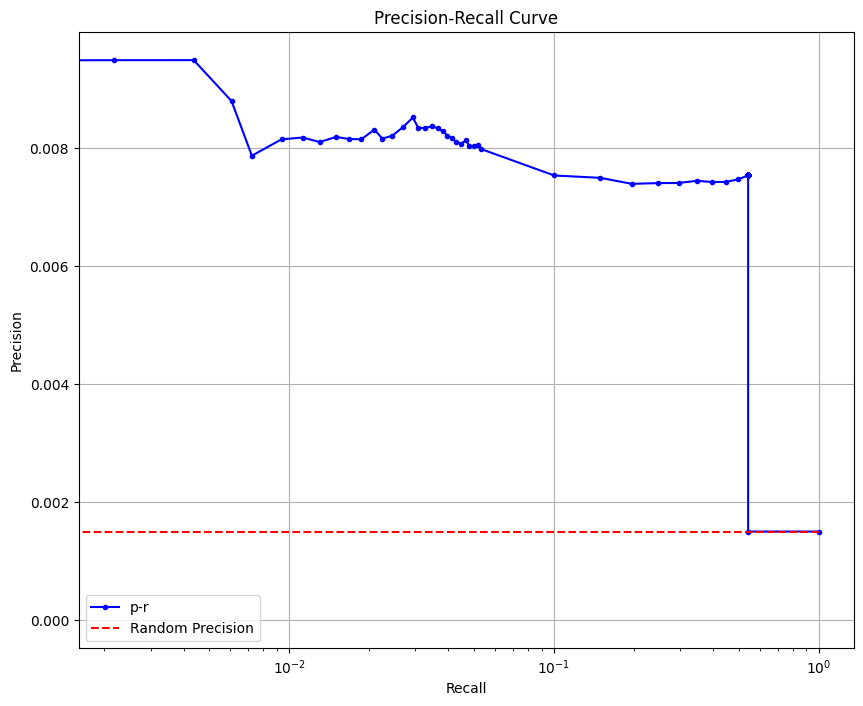

In [7]:
sc.tl.rank_genes_groups(
    adata, groupby="cell_type"
)
adata.var['ensembl_id'] = adata.var.index
adata = adata[adata.X.sum(1) > 500]
shapes = []
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.scale(adata, zero_center=True, max_value=None)
print(adata.shape)
metrics = {}
for celltype in CELLTYPES:
    to_use = adata.uns["rank_genes_groups"]["names"][celltype][
        : NUM_GENES
    ].tolist()
    subadata = adata[adata.obs.cell_type == celltype][:MAXCELLS,  adata.var.index.isin(to_use)].copy()
    print(adata.shape)
    grn = run_deepsem(subadata)
    grn.var.index = make_index_unique(
        grn.var['symbol'].astype(str))
    print(celltype, grn.shape)
    metrics['deepsem_'+celltype] = BenGRN(grn,
                                            do_auc=True, doplot=True).scprint_benchmark()
    grn.varp["GRN"][~grn.var.isTF, :] = 0
    metrics['deepsem_tf_'+celltype] = BenGRN(grn,
                                         do_auc=True, doplot=True).scprint_benchmark()
    shapes.append(grn.shape[1])

In [8]:
shapes

[5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000, 5000]

In [9]:
metrics

{'deepsem_kidney distal convoluted tubule epithelial cell': {'enriched_terms_Central': ['celltype.gmt__Cholangiocytes',
   'celltype.gmt__Ductal cells',
   'celltype.gmt__Loop of Henle cells',
   'celltype.gmt__Distal tubule cells',
   'celltype.gmt__Proximal tubule cells',
   'celltype.gmt__Beta cells'],
  'TF_enr': False,
  'significant_enriched_TFtargets': 2.9411764705882355,
  'precision': 0.0010620463635891406,
  'recall': 0.9998518079430943,
  'rand_precision': 0.001062203773751226,
  'auprc': 0.0010641873013880112,
  'ap': 0.0010648296777881888,
  'epr': 0.9066597960037568},
 'genie3_kidney distal convoluted tubule epithelial cell': {'TF_enr': False,
  'significant_enriched_TFtargets': 2.9411764705882355,
  'precision': 0.004536435786435786,
  'recall': 0.33543272080616476,
  'rand_precision': 0.001062203773751226,
  'auprc': 0.002229334016195257,
  'ap': 0.0025229391415218755,
  'epr': 4.852517453139257},
 'deepsem_kidney loop of Henle thick ascending limb epithelial cell': {'T

In [10]:
True
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False

True

In [11]:
res = []
for k, v in metrics.items():
    res.append([k.split('_')[-1], v['epr'], v['auprc'], v['rand_precision'], v['significant_enriched_TFtargets'], v.get('TF_enr', False), 'tf_' in k])

df = pd.DataFrame(res, columns=['name','EPR', 'AUPRC', 'RAND', 'TF_targ', 'TF_enr', 'TF_only'])
df

,name,EPR,AUPRC,RAND,TF_targ,TF_enr,TF_only
0,kidney distal convoluted tubule epithelial cell,0.906660,0.001064,0.001062,2.941176,False,False
1,kidney distal convoluted tubule epithelial cell,4.852517,0.002229,0.001062,2.941176,False,False
2,kidney loop of Henle thick ascending limb epit...,0.385384,0.001199,0.001212,2.500000,False,False
3,kidney loop of Henle thick ascending limb epit...,4.560142,0.003246,0.001212,2.500000,False,False
4,kidney collecting duct principal cell,0.709180,0.001356,0.001362,5.714286,False,False
5,kidney collecting duct principal cell,5.279308,0.003879,0.001362,4.285714,False,False
6,mesangial cell,0.681120,0.001048,0.001071,4.545455,False,False
7,mesangial cell,3.425602,0.002738,0.001071,0.000000,False,False
8,blood vessel smooth muscle cell,0.816373,0.001663,0.001672,1.785714,False,False
9,blood vessel smooth muscle cell,3.931816,0.004758,0.001672,3.571429,False,False
